In [14]:
import os

In [15]:
from tqdm.notebook import tqdm

In [3]:
from ete3 import Tree
from Bio import Phylo
from io import StringIO
import re

def robinson_foulds(tree1:'Bio.Phylo.BaseTree', tree2:'Bio.Phylo.BaseTree'):
    f = StringIO()
    Phylo.write(tree1, f, 'newick')
    tree1 = Tree(f.getvalue(), format=1)
    # tree1.prune(tree1.get_leaf_names())
    f = StringIO()
    Phylo.write(tree2, f, 'newick')
    tree2 = Tree(f.getvalue(), format=1)
    # tree2.prune(tree2.get_leaf_names())
    try:
        return tree1.robinson_foulds(tree2)[0:2]
    except:
        return tree1.robinson_foulds(tree2, unrooted_trees=True)[0:2]


def loadtree(file):
    with open(file) as f:
        nwt = f.readline()
        nwt = re.sub(">:[0-9].[0-9]*[\)]", ">:1)", nwt)
        nwt = re.sub(">:[0-9].[0-9]*[,]", ">:1,", nwt)
        nwt = re.sub(">:[0-9].[0-9]*[\n]", ">:1\n", nwt)
        tree = Phylo.read(StringIO(nwt), "newick")
        colors = f.readline()
        colors = colors.split("\t")[:-1]
        return tree, colors

In [106]:
import re
trees = []
for i in os.listdir('../results/'):
    if i[-6:] == 'mp.nwk':
        trees.append(re.findall('[0-9]+', i)[-1])
trees = set(trees)

In [81]:
rfs = {'mt_mp':[], 'mt_nj':[], 'mt_ml':[],'mt_dn_mp':[], 'mt_dn_nj':[], 'mt_dn_ml':[],'mt_pre_mp':[], 'mt_pre_nj':[], 'mt_pre_ml':[], 'dna_mp':[], 'dna_nj':[], 'dna_ml':[]}
for tree_no in tqdm(trees):
    try:
        tree_nj = loadtree(f'../results/mt_mut_{tree_no}_nj.nwk')[0]
        tree_mp = loadtree(f'../results/mt_mut_{tree_no}_mp.nwk')[0]
        tree_ml = loadtree(f'../results/mt_mut_{tree_no}.phy.treefile')[0]

        tree_dn_nj = loadtree(f'../results/mt_mut_dn_{tree_no}_nj.nwk')[0]
        tree_dn_mp = loadtree(f'../results/mt_mut_dn_{tree_no}_mp.nwk')[0]
        tree_dn_ml = loadtree(f'../results/mt_mut_dn_{tree_no}.phy.treefile')[0]      

        tree_pre_nj = loadtree(f'../results/mt_mut_pre_{tree_no}_nj.nwk')[0]
        tree_pre_mp = loadtree(f'../results/mt_mut_pre_{tree_no}_mp.nwk')[0]
        tree_pre_ml = loadtree(f'../results/mt_mut_pre_{tree_no}.phy.treefile')[0]

        tree_dna_nj = loadtree(f'../results/dna_mut_{tree_no}_nj.nwk')[0]
        tree_dna_mp = loadtree(f'../results/dna_mut_{tree_no}_mp.nwk')[0]
        tree_dna_ml = loadtree(f'../results/dna_mut_{tree_no}.phy.treefile')[0]

        tree_gt = loadtree(f'../results/linear_tree_gt_{tree_no}.nwk')[0]
        for i in tree_gt.get_terminals():
            i.name = i.name[1:-1]
        rfs['mt_mp'].append(robinson_foulds(tree_gt, tree_mp))
        rfs['mt_nj'].append(robinson_foulds(tree_gt, tree_nj))
        rfs['mt_ml'].append(robinson_foulds(tree_gt, tree_ml))

        rfs['mt_dn_mp'].append(robinson_foulds(tree_gt, tree_dn_mp))
        rfs['mt_dn_nj'].append(robinson_foulds(tree_gt, tree_dn_nj))
        rfs['mt_dn_ml'].append(robinson_foulds(tree_gt, tree_dn_ml))

        rfs['mt_pre_mp'].append(robinson_foulds(tree_gt, tree_pre_mp))
        rfs['mt_pre_nj'].append(robinson_foulds(tree_gt, tree_pre_nj))
        rfs['mt_pre_ml'].append(robinson_foulds(tree_gt, tree_pre_ml))

        rfs['dna_mp'].append(robinson_foulds(tree_gt, tree_dna_mp))
        rfs['dna_nj'].append(robinson_foulds(tree_gt, tree_dna_nj))
        rfs['dna_ml'].append(robinson_foulds(tree_gt, tree_dna_ml))  
    except:
        None

  0%|          | 0/48 [00:00<?, ?it/s]

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

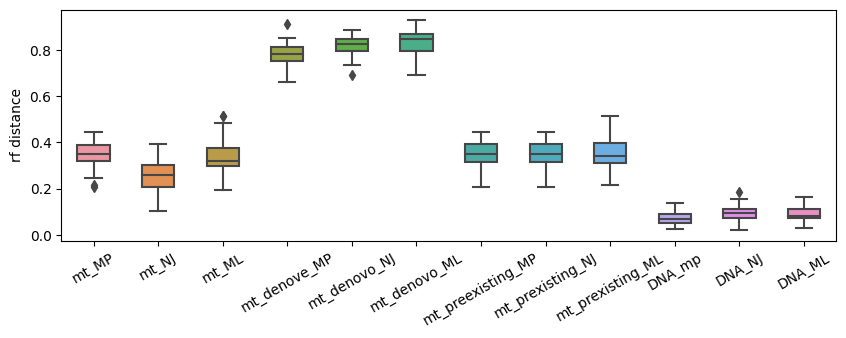

In [84]:
df = pd.DataFrame(columns=['mt_mp', 'mt_nj','mt_ml', 'mt_dn_mp', 'mt_dn_nj', 'mt_dn_ml','mt_pre_mp', 'mt_pre_nj', 'mt_pre_ml','dna_mp', 'dna_nj', 'dna_ml'])
for k in rfs.keys():
    df[k] = [i[0]/i[1] for i in rfs[k] if i[1]]
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(df, ax=ax, width=0.5)
ax.set_ylabel('rf distance')
ax.tick_params(axis='x', rotation=30)
ax.set_xticklabels(['mt_MP', 'mt_NJ','mt_ML', 'mt_denove_MP', 'mt_denovo_NJ', 'mt_denovo_ML','mt_preexisting_MP', 'mt_prexisting_NJ', 'mt_prexisting_ML','DNA_mp', 'DNA_NJ', 'DNA_ML']);

In [132]:
rfs = {'mt_mp':[], 'mt_nj':[], 'mt_ml':[],
       'mt1_mp':[], 'mt1_nj':[], 'mt1_ml':[],
       'mt5_mp':[], 'mt5_nj':[],'mt5_ml':[],
       'mt_dn_mp':[], 'mt_dn_nj':[], 'mt_dn_ml':[],
       'mt1_dn_mp':[], 'mt1_dn_nj':[], 'mt1_dn_ml':[],
       'mt5_dn_mp':[], 'mt5_dn_nj':[], 'mt5_dn_ml':[],
       'mt_pre_mp':[], 'mt_pre_nj':[], 'mt_pre_ml':[], 
       'mt1_pre_mp':[], 'mt1_pre_nj':[], 'mt1_pre_ml':[], 
       'mt5_pre_mp':[], 'mt5_pre_nj':[], 'mt5_pre_ml':[], 
       'dna1.5_mp':[], 'dna1.5_nj':[], 'dna1.5_ml':[],
       'dna0.5_mp':[], 'dna0.5_nj':[], 'dna0.5_ml':[],
      }
for tree_no in tqdm(trees):
    try:
        tree_nj = loadtree(f'../results/mt_mut_{tree_no}_nj.nwk')[0]
        tree_mp = loadtree(f'../results/mt_mut_{tree_no}_mp.nwk')[0]
        tree_ml = loadtree(f'../results/mt_mut_{tree_no}.phy.treefile')[0]
        tree1_nj = loadtree(f'../results/mt1_mut_{tree_no}_nj.nwk')[0]
        tree1_mp = loadtree(f'../results/mt1_mut_{tree_no}_mp.nwk')[0]
        tree1_ml = loadtree(f'../results/mt1_mut_{tree_no}.phy.treefile')[0]
        tree5_nj = loadtree(f'../results/mt5_mut_{tree_no}_nj.nwk')[0]
        tree5_mp = loadtree(f'../results/mt5_mut_{tree_no}_mp.nwk')[0]
        tree5_ml = loadtree(f'../results/mt5_mut_{tree_no}.phy.treefile')[0]

        tree_dn_nj = loadtree(f'../results/mt_mut_dn_{tree_no}_nj.nwk')[0]
        tree_dn_mp = loadtree(f'../results/mt_mut_dn_{tree_no}_mp.nwk')[0]
        tree_dn_ml = loadtree(f'../results/mt_mut_dn_{tree_no}.phy.treefile')[0]
        tree1_dn_nj = loadtree(f'../results/mt1_mut_dn_{tree_no}_nj.nwk')[0]
        tree1_dn_mp = loadtree(f'../results/mt1_mut_dn_{tree_no}_mp.nwk')[0]
        tree1_dn_ml = loadtree(f'../results/mt1_mut_dn_{tree_no}.phy.treefile')[0]
        tree5_dn_nj = loadtree(f'../results/mt5_mut_dn_{tree_no}_nj.nwk')[0]
        tree5_dn_mp = loadtree(f'../results/mt5_mut_dn_{tree_no}_mp.nwk')[0]
        tree5_dn_ml = loadtree(f'../results/mt5_mut_dn_{tree_no}.phy.treefile')[0]

        tree_pre_nj = loadtree(f'../results/mt_mut_pre_{tree_no}_nj.nwk')[0]
        tree_pre_mp = loadtree(f'../results/mt_mut_pre_{tree_no}_mp.nwk')[0]
        tree_pre_ml = loadtree(f'../results/mt_mut_pre_{tree_no}.phy.treefile')[0]
        tree1_pre_nj = loadtree(f'../results/mt1_mut_pre_{tree_no}_nj.nwk')[0]
        tree1_pre_mp = loadtree(f'../results/mt1_mut_pre_{tree_no}_mp.nwk')[0]
        tree1_pre_ml = loadtree(f'../results/mt1_mut_pre_{tree_no}.phy.treefile')[0]
        tree5_pre_nj = loadtree(f'../results/mt5_mut_pre_{tree_no}_nj.nwk')[0]
        tree5_pre_mp = loadtree(f'../results/mt5_mut_pre_{tree_no}_mp.nwk')[0]
        tree5_pre_ml = loadtree(f'../results/mt5_mut_pre_{tree_no}.phy.treefile')[0]

        tree_dna15_nj = loadtree(f'../results/dna_mut_{tree_no}_nj.nwk')[0]
        tree_dna15_mp = loadtree(f'../results/dna_mut_{tree_no}_mp.nwk')[0]
        tree_dna15_ml = loadtree(f'../results/dna_mut_{tree_no}.phy.treefile')[0]
        
        tree_dna5_nj = loadtree(f'../results/dna_mut0.5_{tree_no}_nj.nwk')[0]
        tree_dna5_mp = loadtree(f'../results/dna_mut0.5_{tree_no}_mp.nwk')[0]
        tree_dna5_ml = loadtree(f'../results/dna_mut0.5_{tree_no}.phy.treefile')[0]
        
        tree_gt = loadtree(f'../results/linear_tree_gt_{tree_no}.nwk')[0]
        for i in tree_gt.get_terminals():
            i.name = i.name[1:-1]
        rfs['mt_mp'].append(robinson_foulds(tree_gt, tree_mp))
        rfs['mt_nj'].append(robinson_foulds(tree_gt, tree_nj))
        rfs['mt_ml'].append(robinson_foulds(tree_gt, tree_ml))
        rfs['mt1_mp'].append(robinson_foulds(tree_gt, tree1_mp))
        rfs['mt1_nj'].append(robinson_foulds(tree_gt, tree1_nj))
        rfs['mt1_ml'].append(robinson_foulds(tree_gt, tree1_ml))
        rfs['mt5_mp'].append(robinson_foulds(tree_gt, tree5_mp))
        rfs['mt5_nj'].append(robinson_foulds(tree_gt, tree5_nj))
        rfs['mt5_ml'].append(robinson_foulds(tree_gt, tree5_ml))
        
        rfs['mt_dn_mp'].append(robinson_foulds(tree_gt, tree_dn_mp))
        rfs['mt_dn_nj'].append(robinson_foulds(tree_gt, tree_dn_nj))
        rfs['mt_dn_ml'].append(robinson_foulds(tree_gt, tree_dn_ml))
        rfs['mt1_dn_mp'].append(robinson_foulds(tree_gt, tree1_dn_mp))
        rfs['mt1_dn_nj'].append(robinson_foulds(tree_gt, tree1_dn_nj))
        rfs['mt1_dn_ml'].append(robinson_foulds(tree_gt, tree1_dn_ml))
        rfs['mt5_dn_mp'].append(robinson_foulds(tree_gt, tree5_dn_mp))
        rfs['mt5_dn_nj'].append(robinson_foulds(tree_gt, tree5_dn_nj))
        rfs['mt5_dn_ml'].append(robinson_foulds(tree_gt, tree5_dn_ml))
        
        rfs['mt_pre_mp'].append(robinson_foulds(tree_gt, tree_pre_mp))
        rfs['mt_pre_nj'].append(robinson_foulds(tree_gt, tree_pre_nj))
        rfs['mt_pre_ml'].append(robinson_foulds(tree_gt, tree_pre_ml))
        rfs['mt1_pre_mp'].append(robinson_foulds(tree_gt, tree1_pre_mp))
        rfs['mt1_pre_nj'].append(robinson_foulds(tree_gt, tree1_pre_nj))
        rfs['mt1_pre_ml'].append(robinson_foulds(tree_gt, tree1_pre_ml))
        rfs['mt5_pre_mp'].append(robinson_foulds(tree_gt, tree5_pre_mp))
        rfs['mt5_pre_nj'].append(robinson_foulds(tree_gt, tree5_pre_nj))
        rfs['mt5_pre_ml'].append(robinson_foulds(tree_gt, tree5_pre_ml))
        
        rfs['dna1.5_mp'].append(robinson_foulds(tree_gt, tree_dna15_mp))
        rfs['dna1.5_nj'].append(robinson_foulds(tree_gt, tree_dna15_nj))
        rfs['dna1.5_ml'].append(robinson_foulds(tree_gt, tree_dna15_ml))
        
        rfs['dna0.5_mp'].append(robinson_foulds(tree_gt, tree_dna5_mp))
        rfs['dna0.5_nj'].append(robinson_foulds(tree_gt, tree_dna5_nj))
        rfs['dna0.5_ml'].append(robinson_foulds(tree_gt, tree_dna5_ml))
    except:
        None

  0%|          | 0/47 [00:00<?, ?it/s]

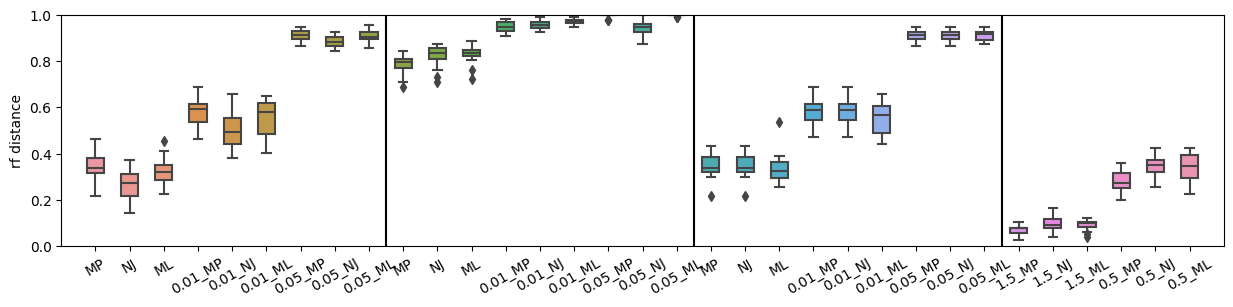

In [138]:
df = pd.DataFrame(columns=['mt_mp', 'mt_nj', 'mt_ml', 'mt1_mp', 'mt1_nj', 'mt1_ml', 'mt5_mp', 'mt5_nj', 'mt5_ml',
                           'mt_dn_mp', 'mt_dn_nj', 'mt_dn_ml', 'mt1_dn_mp', 'mt1_dn_nj', 'mt1_dn_ml', 'mt5_dn_mp', 'mt5_dn_nj', 'mt5_dn_ml', 
                           'mt_pre_mp', 'mt_pre_nj', 'mt_pre_ml', 'mt1_pre_mp', 'mt1_pre_nj', 'mt1_pre_ml', 'mt5_pre_mp', 'mt5_pre_nj', 'mt5_pre_ml',
                           'dna1.5_mp', 'dna1.5_nj', 'dna1.5_ml', 'dna0.5_mp', 'dna0.5_nj', 'dna0.5_ml'])
for k in rfs.keys():
    df[k] = [i[0]/i[1] for i in rfs[k] if i[1]]
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.boxplot(df, ax=ax, width=0.5)
ax.set_ylabel('rf distance')
ax.tick_params(axis='x', rotation=30)
for i in range(1, 4):
    ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,33))
ax.set_ylim((0,1))
ax.set_xticklabels(['MP', 'NJ', 'ML', '0.01_MP', '0.01_NJ', '0.01_ML', '0.05_MP', '0.05_NJ', '0.05_ML',
                    'MP', 'NJ', 'ML', '0.01_MP', '0.01_NJ', '0.01_ML', '0.05_MP', '0.05_NJ', '0.05_ML',
                    'MP', 'NJ', 'ML', '0.01_MP', '0.01_NJ', '0.01_ML', '0.05_MP', '0.05_NJ', '0.05_ML',
                    '1.5_MP', '1.5_NJ', '1.5_ML', '0.5_MP', '0.5_NJ', '0.5_ML']);

In [134]:
df.shape

(16, 33)

In [ ]:
df = pd.DataFrame(columns=['mt_mp', 'mt_nj', 'mt1_mp', 'mt1_nj', 'mt5_mp', 'mt5_nj', 
                           'mt_dn_mp', 'mt_dn_nj','mt1_dn_mp', 'mt1_dn_nj','mt5_dn_mp', 'mt5_dn_nj',
                           'mt_pre_mp', 'mt_pre_nj','mt1_pre_mp', 'mt1_pre_nj','mt5_pre_mp', 'mt5_pre_nj',
                           'dna1.5_mp', 'dna1.5_nj', 'dna0.5_mp', 'dna0.5_nj'])
for k in rfs.keys():
    df[k] = [i[0]/i[1] for i in rfs[k] if i[1]]
fig, ax = plt.subplots(figsize=(12,3))
ax = sns.boxplot(df, ax=ax, width=0.5)
ax.set_ylabel('rf distance')
ax.tick_params(axis='x', rotation=30)
for i in range(1, 4):
    ax.vlines(6*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,22))
ax.set_ylim((0,1))
ax.set_xticklabels(['MP', 'NJ', '0.01_MP', '0.01_NJ','0.05_MP', '0.05_NJ', 
                    'MP', 'NJ', '0.01_MP', '0.01_NJ','0.05_MP', '0.05_NJ', 
                    'MP', 'NJ', '0.01_MP', '0.01_NJ','0.05_MP', '0.05_NJ', 
                    '1.5_MP', '1.5_NJ', '0.5_MP', '0.5_NJ']);

In [37]:
tree_nj = loadtree(f'../results/mt_constant_mut_516431_nj.nwk')[0]
tree_mp = loadtree(f'../results/mt_constant_mut_516431_mp.nwk')[0]
tree_dna_nj = loadtree(f'../results/dna_constant_mut_516431_nj.nwk')[0]
tree_dna_mp = loadtree(f'../results/dna_constant_mut_516431_mp.nwk')[0]
tree_gt = loadtree(f'../results/linear_tree_gt_516431.nwk')[0]
for i in tree_gt.get_terminals():
    i.name = i.name[1:-1]

In [40]:
tree_ml = loadtree('../results/mt_constant_mut_516431.phy.treefile')[0]

In [60]:
tree_dna_ml = loadtree('../results/dna_constant_mut_516431.phy.treefile')[0]

In [61]:
from itertools import combinations

In [62]:
tree_cmp = pd.DataFrame(index=['GroundTruth', 'mt_MP', 'mt_NJ', 'mt_ML', 'DNA_MP', 'DNA_NJ', 'DNA_ML'], columns=['GroundTruth', 'mt_MP', 'mt_NJ', 'mt_ML', 'DNA_MP', 'DNA_NJ', 'DNA_ML'])
for t1, t2 in combinations(zip(['GroundTruth', 'mt_MP', 'mt_NJ', 'mt_ML', 'DNA_MP', 'DNA_NJ', 'DNA_ML'], [tree_gt, tree_mp, tree_nj, tree_ml, tree_dna_mp, tree_dna_nj, tree_dna_ml]), 2):
    rf = robinson_foulds(t2[1], t1[1])
    tree_cmp[t2[0]][t1[0]] = rf[0]/rf[1]

In [63]:
tree_cmp

,GroundTruth,mt_MP,mt_NJ,mt_ML,DNA_MP,DNA_NJ,DNA_ML
GroundTruth,NaN,0.203611,0.243731,0.112337,0.219659,0.221665,0.23671
mt_MP,NaN,NaN,0.294885,0.192578,0.355065,0.356068,0.37011
mt_NJ,NaN,NaN,NaN,0.273821,0.377131,0.378134,0.390171
mt_ML,NaN,NaN,NaN,NaN,0.293882,0.295888,0.300903
DNA_MP,NaN,NaN,NaN,NaN,NaN,0.003009,0.191575
DNA_NJ,NaN,NaN,NaN,NaN,NaN,NaN,0.194584
DNA_ML,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
tree_cmp[tree_cmp==0] = np.nan
tree_cmp = tree_cmp.astype(float)

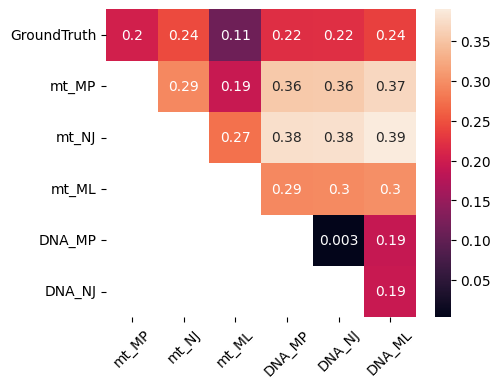

In [66]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(tree_cmp.iloc[:-1, 1:], ax=ax, annot=True)
a = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)